# RNN 이용한 자동완성

- RNN 47 ~61

In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

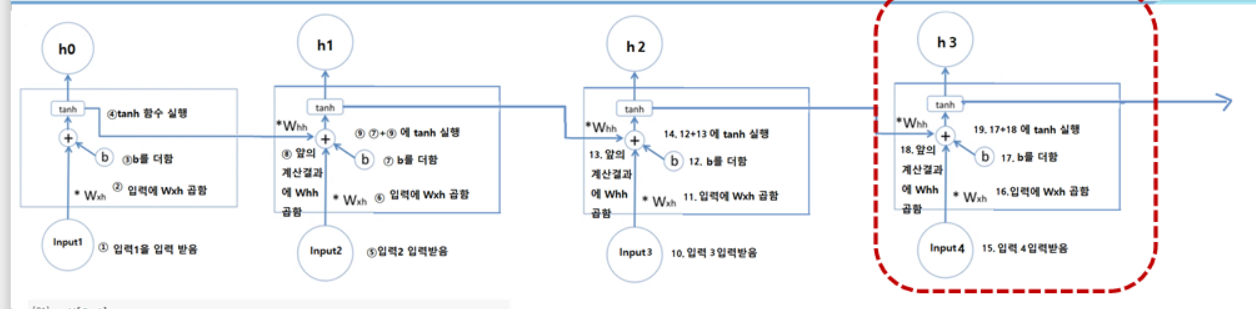

In [ ]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [ ]:
X = np.array([h, e, l, l], dtype = np.float32)

In [ ]:
Wxh = tf.Variable([
                   [1],
                   [2],
                   [3],
                   [4]
], dtype = np.float32)

# bias
b = tf.Variable([5], dtype = np.float32)

Whh = tf.Variable([[.1]], dtype = np.float32)

# 첫번째 예측
# X[0]에 Wxh 곱하고(tf.matul(X[0], Wxh))  b더함
h0 = tf.matmul(X[0:1], Wxh) + b

h0 = tf.tanh(h0)
h0

<tf.Tensor: id=166, shape=(1, 1), dtype=float32, numpy=array([[0.9999876]], dtype=float32)>

In [ ]:
h1 = tf.matmul(X[1:2], Wxh) + b

# h1에 h0 * Whh를 더함
h1 = h1 * tf.matmul(h0,Whh)

# tanh 활성함수
h1 = tf.tanh(h1)


In [ ]:
h2 = tf.matmul(X[2 :3],Wxh) +b

# h2에 h1 * Whh 더함
h2 = h2 + tf.matmul(h1, Whh)

# 활성함수
h2 = tf.tanh(h2)

In [ ]:
h3 = tf.matmul(X[3 :4],Wxh) +b

# h2에 h1 * Whh 더함
h3 = h3 + tf.matmul(h2, Whh)

# 활성함수
h3 = tf.tanh(h3)

In [ ]:
# 출력 결과가 4칸이므로 h3을 4번 선형 회귀하기위해서 곱하는 w
w0 = tf.Variable([
                  [0.1, 0.2, 0.3, 0.4]
], dtype =np.float32)

# 출력 결과가 4칸 -> 4번 선형 회귀에 필요한 bias
b0 = tf.Variable([0.5, 0.6, 0.7, 0.8], dtype = np.float32)

In [ ]:
# 예측할 값
y = np.array(
    [
     [0, 0, 0, 1]
    ]
    ,dtype = np.float32
)

In [ ]:
# 예측값
hypothesis = tf.nn.softmax(tf.matmul(h3, w0) +b0)

# 오차
cost = -tf.reduce_mean(y * tf.log(hypothesis)/len(hypothesis))
print(cost)

tf.Tensor(0.27778855, shape=(), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for i in range(1000):
  print("=" * 100)
  print("i =", i)
  with tf.GradientTape() as tape:
    h0 = tf.matmul(X[0:1], Wxh) + b

    h1 = tf.matmul(X[1:2], Wxh) +b
    h1 = h1 + tf.matmul(h0, Whh)
    h1 = tf.tanh(h1)

    h2 = tf.matmul(X[2:3], Wxh) + b
    h2 = h2 + tf.matmul(h1, Whh)
    h2 = tf.tanh(h2)

    h3 = tf.matmul(X[3:4], Wxh) + b
    h3 = h3 + tf.matmul(h2, Whh)
    h3 = tf.tanh(h3)

    hypothesis = tf.nn.softmax(tf.matmul(h3, w0) +b0)

    # cost
    cost = -tf.reduce_mean(y * tf.log(hypothesis)/len(hypothesis))
    print("cost = ", cost)

    grads = tape.gradient(cost, [Wxh,b,Whh,w0,b0])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [Wxh, b, Whh, w0, b0]))

i = 0
cost =  tf.Tensor(0.27778855, shape=(), dtype=float32)
i = 1
cost =  tf.Tensor(0.27112472, shape=(), dtype=float32)
i = 2
cost =  tf.Tensor(0.2645528, shape=(), dtype=float32)
i = 3
cost =  tf.Tensor(0.2580756, shape=(), dtype=float32)
i = 4
cost =  tf.Tensor(0.25169557, shape=(), dtype=float32)
i = 5
cost =  tf.Tensor(0.24541529, shape=(), dtype=float32)
i = 6
cost =  tf.Tensor(0.23923713, shape=(), dtype=float32)
i = 7
cost =  tf.Tensor(0.23316337, shape=(), dtype=float32)
i = 8
cost =  tf.Tensor(0.2271961, shape=(), dtype=float32)
i = 9
cost =  tf.Tensor(0.22133729, shape=(), dtype=float32)
i = 10
cost =  tf.Tensor(0.21558872, shape=(), dtype=float32)
i = 11
cost =  tf.Tensor(0.20995201, shape=(), dtype=float32)
i = 12
cost =  tf.Tensor(0.20442861, shape=(), dtype=float32)
i = 13
cost =  tf.Tensor(0.1990198, shape=(), dtype=float32)
i = 14
cost =  tf.Tensor(0.19372654, shape=(), dtype=float32)
i = 15
cost =  tf.Tensor(0.18854974, shape=(), dtype=float32)
i = 16
cost =  tf.Tens

In [ ]:
#
h0 = tf.matmul(X[0:1], Wxh) + b

# tanh 활성함수
h0 = tf.tanh(h0)

#
h1 = tf.matmul(X[1:2], Wxh) + b

# h1에 h0 * Whh를 더함
h1 = h1 * tf.matmul(h0,Whh)

# tanh 활성함수
h1 = tf.tanh(h1)

#
h2 = tf.matmul(X[2 :3],Wxh) +b

# h2에 h1 * Whh 더함
h2 = h2 + tf.matmul(h1, Whh)

# 활성함수
h2 = tf.tanh(h2)

#
h3 = tf.matmul(X[3 :4],Wxh) +b

# h2에 h1 * Whh 더함
h3 = h3 + tf.matmul(h2, Whh)

# 활성함수
h3 = tf.tanh(h3)

hypothesis = tf.nn.softmax(tf.matmul(h3, w0) + b0)

In [ ]:
hypothesis.numpy()

array([[9.7657111e-04, 1.1927863e-03, 1.4568715e-03, 9.9637371e-01]],
      dtype=float32)